In [304]:
import requests
from bs4 import BeautifulSoup as bs
import re

url="http://www.bjsubway.com/e/action/ListInfo/?classid=39&ph=1"
respones=requests.get(url)
# respones.text
soup=bs(respones.text,'html.parser')


In [227]:
LINES=soup.select("div tbody")     #acquire all subway line


In [228]:
all_lines=[]
for line in LINES:
    lines=[]
    line_stations=line.select("tr")
    for stations in line_stations:    
        station=at=stations.text.split("\n",2)[1].strip()
        lines.append(station)
    all_lines.append(lines)

# print(all_lines)
# print(len(all_lines))
all_lines[4]

['金安桥',
 '苹果园',
 '杨庄',
 '西黄村',
 '廖公庄',
 '田村',
 '海淀五路居',
 '慈寿寺',
 '花园桥',
 '白石桥南',
 '车公庄西',
 '车公庄',
 '平安里',
 '北海北',
 '南锣鼓巷',
 '东四',
 '朝阳门',
 '东大桥',
 '呼家楼',
 '金台路',
 '十里堡',
 '青年路',
 '褡裢坡',
 '黄渠',
 '常营',
 '草房',
 '物资学院路',
 '通州北关',
 '通运门',
 '北运河西',
 '北运河东',
 '郝家府',
 '东夏园',
 '潞城']

In [229]:
all_stations_names=""
for i in all_lines:
    for j in i:
        j+=" "
        all_stations_names+=j
ALL_STATION_NAME=all_stations_names.split()
ALL_STATION_NAME


        

['苹果园',
 '古城',
 '八角游乐园',
 '八宝山',
 '玉泉路',
 '五棵松',
 '万寿路',
 '公主坟',
 '军事博物馆',
 '木樨地',
 '南礼士路',
 '复兴门',
 '西单',
 '天安门西',
 '天安门东',
 '王府井',
 '东单',
 '建国门',
 '永安里',
 '国贸',
 '大望路',
 '四惠',
 '四惠东',
 '西直门',
 '积水潭',
 '鼓楼大街',
 '安定门',
 '雍和宫',
 '东直门',
 '东四十条',
 '朝阳门',
 '建国门',
 '北京站',
 '崇文门',
 '前门',
 '和平门',
 '宣武门',
 '长椿街',
 '复兴门',
 '阜成门',
 '车公庄',
 '天宫院',
 '生物医院基地',
 '义和庄',
 '黄村火车站',
 '黄村西大街',
 '清源路',
 '枣园',
 '高米店南',
 '高米店北',
 '西红门',
 '新宫',
 '公益西桥',
 '角门西',
 '马家堡',
 '北京南站',
 '陶然亭',
 '菜市口',
 '宣武门',
 '西单',
 '灵境胡同',
 '西四',
 '平安里',
 '新街口',
 '西直门',
 '动物园',
 '国家图书馆',
 '魏公村',
 '人民大学',
 '海淀黄庄',
 '中关村',
 '北京大学东门',
 '圆明园',
 '西苑',
 '北宫门',
 '安河桥北',
 '宋家庄',
 '刘家窑',
 '蒲黄榆',
 '天坛东门',
 '磁器口',
 '崇文门',
 '东单',
 '灯市口',
 '东四',
 '张自忠路',
 '北新桥',
 '雍和宫',
 '和平里北街',
 '和平西桥',
 '惠新西街南口',
 '惠新西街北口',
 '大屯路东',
 '北苑路北',
 '立水桥南',
 '立水桥',
 '天通苑南',
 '天通苑',
 '天通苑北',
 '金安桥',
 '苹果园',
 '杨庄',
 '西黄村',
 '廖公庄',
 '田村',
 '海淀五路居',
 '慈寿寺',
 '花园桥',
 '白石桥南',
 '车公庄西',
 '车公庄',
 '平安里',
 '北海北',
 '南锣鼓巷',
 '东四',
 '朝阳门',
 '东大桥',
 '呼家楼',
 '金台路',
 '十里堡',
 '青年路'

In [309]:
LIST=[]
seen=set()      #because one station can appear in more than one lines.
for names in ALL_STATION_NAME:    
    if names in seen: continue
    stations_collection={}
    if ALL_STATION_NAME.count(names) > 1:
        stations_collection[names]=" "
        for i in all_lines:
            if names in i:
                n=i.index(names)
#                 stations_collection[names]=" "   #wrong palce
                if n == len(i)-1: stations_collection[names]+=" "+i[n-1]
                elif n == 0: stations_collection[names] += " " + i[1]
                else: stations_collection[names]+=" " + i[n-1] + " " + i[n+1]
                seen.add(names)
    else:
        for i in all_lines:            
            if names in i:
                n = i.index(names)
                if n == len(i)-1: stations_collection[names]=i[n-1]
                elif n == 0: stations_collection[names] =  i[1]
                else: stations_collection[names]=i[n-1] +" "+ i[n+1] 
                seen.add(names)
    LIST.append(stations_collection)
LIST[0]

{'苹果园': '  古城 金安桥 杨庄'}

In [310]:
STATIONS_COLLECTION={}
for i in LIST:
    for k,v in i.items():
        STATIONS_COLLECTION[k]=list(set(v.split()))
STATIONS_COLLECTION
        

{'七里庄': ['大井', '丰台东大街', '六里桥', '西局'],
 '万寿路': ['公主坟', '五棵松'],
 '万源街': ['荣京东街', '亦庄文化园'],
 '三元桥': ['亮马桥', '太阳宫'],
 '上地': ['西二旗', '五道口'],
 '上岸': ['桥户营', '栗园庄'],
 '东单': ['崇文门', '灯市口', '建国门', '王府井'],
 '东四': ['灯市口', '南锣鼓巷', '朝阳门', '张自忠路'],
 '东四十条': ['东直门', '朝阳门'],
 '东夏园': ['潞城', '郝家府'],
 '东大桥': ['呼家楼', '朝阳门'],
 '东湖渠': ['来广营', '望京'],
 '东直门': ['雍和宫', '柳芳', '东四十条'],
 '东风北桥': ['将台', '枣营'],
 '东高地': ['火箭万源', '和义'],
 '中关村': ['北京大学东门', '海淀黄庄'],
 '中国美术馆': ['南锣鼓巷'],
 '丰台东大街': ['七里庄', '丰台南路'],
 '丰台南路': ['科怡路', '丰台东大街'],
 '丰台科技园': ['科怡路', '郭公庄'],
 '丰台站': ['泥洼', '首经贸'],
 '临河里': ['土桥', '梨园'],
 '义和庄': ['黄村火车站', '生物医院基地'],
 '九棵树': ['果园', '梨园'],
 '九龙山': ['大郊亭', '平乐园', '大望路', '双井'],
 '五棵松': ['万寿路', '玉泉路'],
 '五福堂': ['德茂', '火箭万源'],
 '五道口': ['上地', '知春路'],
 '亦庄文化园': ['万源街', '亦庄桥'],
 '亦庄桥': ['旧宫', '亦庄文化园'],
 '亦庄火车站': ['次渠'],
 '亮马桥': ['农业展览馆', '三元桥'],
 '人民大学': ['海淀黄庄', '魏公村'],
 '什刹海': ['南锣鼓巷', '鼓楼大街'],
 '传媒大学': ['高碑店', '双桥'],
 '俸伯': ['顺义'],
 '健德门': ['北土城', '牡丹园'],
 '光熙门': ['柳芳', '芍药居'],
 '八宝山': ['玉泉路', '八角游乐园'],
 

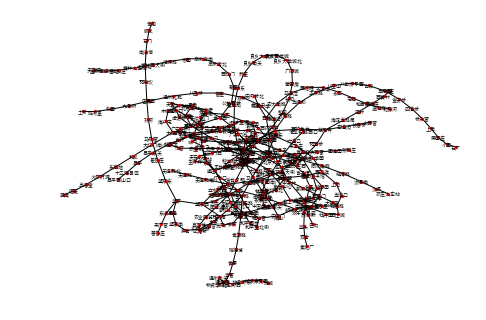

In [283]:
import networkx as nx
%matplotlib inline
nx.draw(nx.Graph(STATIONS_COLLECTION),with_labels=True,font_size=5,node_size=5) 
# Settinf font_size to change the size of the labels
#The basic usage of networkx see the link https://blog.csdn.net/suncherrydream/article/details/53234254

In [347]:
def navigator(collection_graph,start,destination):
    pathes=[[start]]
    seen=set()
    
    while pathes:
        path=pathes.pop(0)
        frontier=path[-1]
        if frontier in seen: continue
        successors=collection_graph[frontier]
        for i in successors:
            if i in path: continue
            if i == destination:
                path.append(i)
                return path
            else:
                pathes.append(path+[i])
            pathes=sorted(pathes,key=len)
        
        seen.add(frontier)
navigator(STATIONS_COLLECTION,"五道口","公主坟")

['五道口', '知春路', '大钟寺', '西直门', '动物园', '国家图书馆', '白石桥南', '白堆子', '军事博物馆', '公主坟']

In [331]:
def is_goal(destination):
    def _wrap(current_path):
        return current_path[-1] == destination
    return _wrap

In [332]:
def sort_path(cmp_func, beam=-1):
    def _sorted(pathes):
        return sorted(pathes, key=cmp_func)[:beam]
    return _sorted

In [355]:
def get_as_much_path(path): 
    return -1 * len(path)

In [336]:
def search(collection_graph,start,is_goal,search_strategy):
    pathes=[[start]]
    seen=set()
    
    while pathes:
        path=pathes.pop(0)
        frontier=path[-1]
        if frontier in seen: continue
        successors=collection_graph[frontier]
        for i in successors:
            if i in path: continue
            new_path=path+[i]
            pathes.append(new_path)
            if is_goal(new_path):
                return new_path
        
        seen.add(frontier)
        pathes=search_strategy(pathes)
        

    

In [339]:
def get_total_stations(path):
    
    return len(path)

In [353]:

search(STATIONS_COLLECTION,start="五道口",is_goal=is_goal("公主坟"),
       search_strategy=sort_path(get_total_stations,beam=4))

['五道口',
 '知春路',
 '大钟寺',
 '西直门',
 '积水潭',
 '鼓楼大街',
 '什刹海',
 '南锣鼓巷',
 '北海北',
 '平安里',
 '车公庄',
 '阜成门',
 '复兴门',
 '南礼士路',
 '木樨地',
 '军事博物馆',
 '公主坟']

In [356]:
search(STATIONS_COLLECTION,start="五道口",is_goal=is_goal("公主坟"),
       search_strategy=sort_path(get_as_much_path,beam=4))

['五道口',
 '上地',
 '西二旗',
 '龙泽',
 '回龙观',
 '霍营',
 '育新',
 '西小口',
 '永泰庄',
 '林萃桥',
 '森林公园南门',
 '奥林匹克公园',
 '安立路',
 '大屯路东',
 '惠新西街北口',
 '惠新西街南口',
 '芍药居',
 '太阳宫',
 '三元桥',
 '亮马桥',
 '农业展览馆',
 '团结湖',
 '呼家楼',
 '金台夕照',
 '国贸',
 '永安里',
 '建国门',
 '北京站',
 '崇文门',
 '磁器口',
 '广渠门内',
 '广渠门外',
 '双井',
 '九龙山',
 '平乐园',
 '北工大西门',
 '十里河',
 '方庄',
 '蒲黄榆',
 '刘家窑',
 '宋家庄',
 '石榴庄',
 '大红门',
 '角门东',
 '角门西',
 '草桥',
 '纪家庙',
 '首经贸',
 '丰台站',
 '泥洼',
 '西局',
 '七里庄',
 '六里桥',
 '六里桥东',
 '北京西站',
 '军事博物馆',
 '公主坟']

In [357]:
search(STATIONS_COLLECTION,start="五道口",is_goal=is_goal("公主坟"),
       search_strategy=lambda n:n)

['五道口', '知春路', '大钟寺', '西直门', '动物园', '国家图书馆', '白石桥南', '白堆子', '军事博物馆', '公主坟']